In [2]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

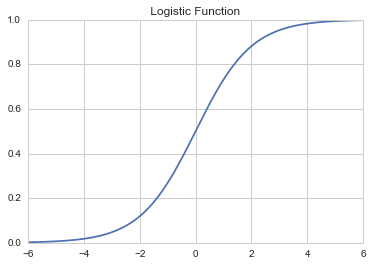

In [3]:
# Logistic Function
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t) )

# Set t from -6 to 6 ( 500 elements, linearly spaced)
t = np.linspace(-6,6,500)

# Set up y values (using list comprehension)
y = np.array([logistic(ele) for ele in t])

# Plot
plt.plot(t,y)
plt.title(' Logistic Function ')

In [4]:
# Standard method of loading Statsmodels datasets into a pandas DataFrame. Note the name fair stands for 'affair' dataset.
df = sm.datasets.fair.load_pandas().data

In [5]:
# Preview
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [6]:
# Create check function
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

# Apply to DataFrame
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [7]:
# DataFrame Check
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


TypeError: 'NoneType' object is not iterable

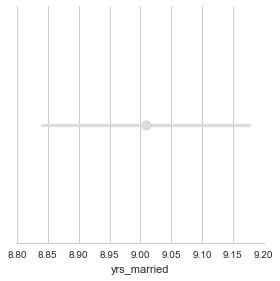

In [10]:
# Factorplot for years married with Had Affair hue
sns.factorplot('yrs_married',data=df,hue='Had_Affair',palette='coolwarm')

In [11]:
# Groupby Had Affair column
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


TypeError: 'NoneType' object is not iterable

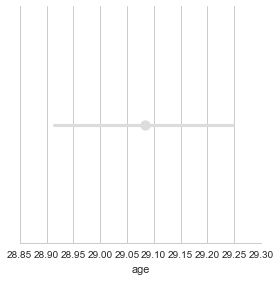

In [12]:
# Factorplot for age with Had Affair hue
sns.factorplot('age',data=df,hue='Had_Affair',palette='coolwarm')

TypeError: 'NoneType' object is not iterable

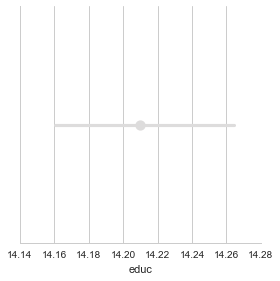

In [13]:
# Factorplot for number of children with Had Affair hue
sns.factorplot('educ',data=df,hue='Had_Affair',palette='coolwarm')

In [14]:
# Create new DataFrames for the Categorical Variables
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

# Let's take a quick look at the results
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
# Create column names for the new DataFrames
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [16]:
# Set X as new DataFrame without the occupation columns or the Y target
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)

In [17]:
# Concat the dummy DataFrames Together
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [18]:
# Now Concat the X DataFrame with the dummy variables
X = pd.concat([X,dummies],axis=1)

# Preview of Result
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
# Set Y as Target class, Had Affair
Y = df.Had_Affair

# Preview
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [20]:
# Dropping one column of each dummy variable set to avoid multicollinearity
X = X.drop('occ1',axis=1)
X = X.drop('hocc1',axis=1)

# Drop affairs column so Y target makes sense
X = X.drop('affairs',axis=1)

# PReview
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.0,27.0,13.0,3.0,1.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.0,22.0,2.5,0.0,1.0,16.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,27.0,9.0,1.0,1.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
# Flatten array
Y = np.ravel(Y)

# Check result
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [22]:
# Create LogisticRegression model
log_model = LogisticRegression()

# Fit our data
log_model.fit(X,Y)

# Check our accuracy
log_model.score(X,Y)

0.72588752748978946

In [23]:
# Check percentage of women that had affairs
Y.mean()

0.32249450204209867

In [28]:
# Use zip to bring the column names and the np.transpose function to bring together the coefficients from the model
coeff_df = DataFrame(zip(X.columns, np.transpose(log_model.coef_)))

TypeError: data argument can't be an iterator

In [25]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# Make a new log_model
log_model2 = LogisticRegression()

# Now fit the new model
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [27]:
# Predict the classes of the testing data set
class_predict = log_model2.predict(X_test)

# Compare the predicted classes to the actual test classes
print (metrics.accuracy_score(Y_test,class_predict))

0.729899497487


In [29]:
#Here, I have tried to load the Boston Data and provide the detailed model analysis for it so that I could get it done for 

In [ ]:
#Our provided requirement as well. Why Logistic Regression Sampling was chosen to find the observant pattern.